In [3]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
df = pd.read_csv(uri)
df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
df.rename(columns={'unfinished':'nao_finalizado','expected_hours':'horas_esperadas','price':'preco'},inplace=True)
df['finalizado'] = df.nao_finalizado.apply(lambda x: 1 if x==0 else 0)
df.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


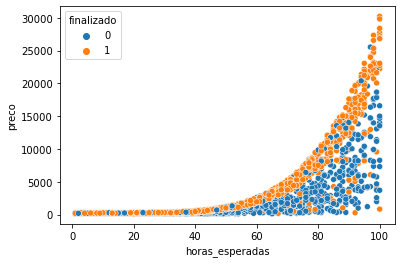

In [5]:
import seaborn as sns
ax = sns.scatterplot(x='horas_esperadas',y='preco',hue='finalizado',data=df)

In [9]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df[['horas_esperadas','preco']]
y = df['finalizado']
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y,random_state=20,stratify = y,test_size=0.25)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x,treino_y)
previsao = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y,previsao)*100
print(f'A acurácia do modelo é de {acuracia.round(2)}%')

A acurácia do modelo é de 70.37%


In [7]:
teste_y.shape[0]
previsao_base = np.ones(teste_y.shape[0])
acuracia = accuracy_score(teste_y,previsao_base)*100
print(f'A acurácia do modelo baseline é de {acuracia.round(2)}%')

A acurácia do modelo baseline é de 52.59%
